In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
import time
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torch.nn.functional as F

In [23]:
transform = transforms.Compose([
    transforms.Resize(28),
    transforms.CenterCrop(28),
    transforms.ToTensor(),
    #transforms.RandomHorizontalFlip(),
    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])
print(transform)

train_datasets_path = 'images\train'
test_datasets_path = 'images\test'

Compose(
    Resize(size=28, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(28, 28))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)


In [24]:
train_dataset = datasets.ImageFolder(r'images\train',transform=transform)
print(train_dataset)
test_dataset = datasets.ImageFolder(r'images\test',transform=transform)
print(test_dataset)

Dataset ImageFolder
    Number of datapoints: 75
    Root location: images\train
    StandardTransform
Transform: Compose(
               Resize(size=28, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(28, 28))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )
Dataset ImageFolder
    Number of datapoints: 20
    Root location: images\test
    StandardTransform
Transform: Compose(
               Resize(size=28, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(28, 28))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


In [25]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=120, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=60, shuffle=True)

In [26]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([75, 3, 28, 28])
torch.Size([75])


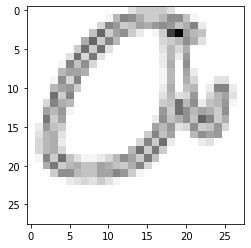

Answer:  0


In [27]:
plt.imshow(images[60][0].numpy().squeeze(), cmap='gray_r')
plt.show()
print('Answer: ',labels[60].numpy())

In [28]:
class Net(nn.Module): #แก้ตรงนี้เป็นต้นไป
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5,1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5,1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16*4*4,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*4*4)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        
        return x
net = Net()

In [29]:
device = torch.device('cpu')
print(device)
net = Net().to(device)
print(net)

cpu
Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [30]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [31]:
def train(net):
    start = time.time()
    for epoch in range(100):
        running_loss=0.0
        for i, data in enumerate(trainloader,0):
            inputs, labels= data[0].to(device,non_blocking=True),data[1].to(device,non_blocking=True)
            
            optimizer.zero_grad()
            outputs = net(inputs)
            loss=criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            print('Epoch {} - Training loss: {}'.format(epoch,running_loss/len(trainloader)))
    end = time.time()
    print('%0.2f minutes'%((end-start)/60))

In [32]:
train(net)

Epoch 0 - Training loss: 2.3188536167144775
Epoch 1 - Training loss: 2.3184752464294434
Epoch 2 - Training loss: 2.317756175994873
Epoch 3 - Training loss: 2.3167331218719482
Epoch 4 - Training loss: 2.3154380321502686
Epoch 5 - Training loss: 2.3138999938964844
Epoch 6 - Training loss: 2.312148332595825
Epoch 7 - Training loss: 2.3102049827575684
Epoch 8 - Training loss: 2.308091163635254
Epoch 9 - Training loss: 2.3058340549468994
Epoch 10 - Training loss: 2.3034605979919434
Epoch 11 - Training loss: 2.300976514816284
Epoch 12 - Training loss: 2.2983932495117188
Epoch 13 - Training loss: 2.2957231998443604
Epoch 14 - Training loss: 2.2929937839508057
Epoch 15 - Training loss: 2.290224552154541
Epoch 16 - Training loss: 2.2874205112457275
Epoch 17 - Training loss: 2.284571647644043
Epoch 18 - Training loss: 2.2816810607910156
Epoch 19 - Training loss: 2.278756618499756
Epoch 20 - Training loss: 2.275803327560425
Epoch 21 - Training loss: 2.272824287414551
Epoch 22 - Training loss: 2.2

In [33]:
dataiter = iter(testloader)
images_test, labels_test = dataiter.next()
print(images_test.shape)
print(labels_test.shape)

torch.Size([20, 3, 28, 28])
torch.Size([20])


torch.Size([20, 3, 28, 28]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


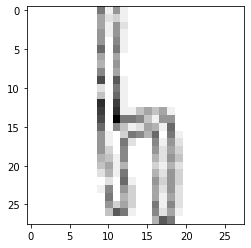

Answer:  1
Accuracy of the network on test images: 9 %


In [37]:
outputs = net(images_test)
_, predicted = torch.max(outputs, 1)
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images_test, labels_test = data
        outputs = net(images_test)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        print(images_test.shape, predicted)
        correct_test += (predicted == labels_test).sum().item()
        
plt.imshow(images_test[10][0].numpy().squeeze(), cmap='gray_r')
plt.show()
print('Answer: ',labels_test[10].numpy())

print('Accuracy of the network on test images: %d %%' % (
    100 * correct_test / total_test))